# PART 2: Exploratory Data Analysis (EDA)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn-v0_8-whitegrid')


In [7]:
# === 1. Load dữ liệu ===
def load_data(full_path, name):
    df = pd.read_csv(full_path, parse_dates=['Date'])
    df = df[['Date', 'Price']].rename(columns={'Price': name})
    df.set_index('Date', inplace=True)
    return df

btc = load_data('C:/Users/DELL/OneDrive/Documents/BIG DATA/BTC_cleaned.csv', 'BTC')
vni = load_data('C:/Users/DELL/OneDrive/Documents/BIG DATA/VNI_cleaned.csv', 'VNI')
xau = load_data('C:/Users/DELL/OneDrive/Documents/BIG DATA/XAU_cleaned.csv', 'XAU')

# Gộp theo ngày giao dịch chung
data = pd.concat([btc, vni, xau], axis=1).dropna()

In [8]:
# === 2. Tính log-return ===
returns = np.log(data / data.shift(1)).dropna()

# Tách riêng từng tài sản
btc_returns = returns['BTC']
vni_returns = returns['VNI']
xau_returns = returns['XAU']

In [9]:
# === 3. Thống kê mô tả + Sharpe Ratio ===
summary_stats = returns.agg(['mean', 'std', 'skew', 'kurtosis']).T
summary_stats['Sharpe Ratio'] = summary_stats['mean'] / summary_stats['std']
print("📊 Summary Statistics:")
print(summary_stats)

📊 Summary Statistics:
         mean       std      skew   kurtosis  Sharpe Ratio
BTC  0.002330  0.044209 -0.664645  10.838386      0.052713
VNI  0.000332  0.011650 -0.931828   5.281155      0.028519
XAU  0.000402  0.009461 -0.138480   3.511386      0.042458


Comments: The summary statistics highlight distinct characteristics of the three assets.
- Bitcoin (BTC) shows the highest average return (0.233%) but also the highest volatility, indicating strong return potential paired with significant risk. Gold (XAU) and Vietnam’s stock index (VNI) have much lower returns (0.040% and 0.033%, respectively), with gold being the most stable asset.

- In terms of distribution, BTC and VNI exhibit negative skewness, suggesting a higher likelihood of sharp declines. BTC also has an extremely high kurtosis (~10.8), indicating fat tails and frequent extreme movements. VNI shares similar features but to a lesser extent. Gold’s distribution is more symmetric and closer to normal, reaffirming its safe-haven status.

- The Sharpe Ratio further supports these insights: BTC delivers the highest return per unit of risk, despite its volatility. Gold follows with a decent risk-adjusted return and low volatility. VNI, however, offers the lowest Sharpe Ratio, suggesting relatively poor compensation for its risk.

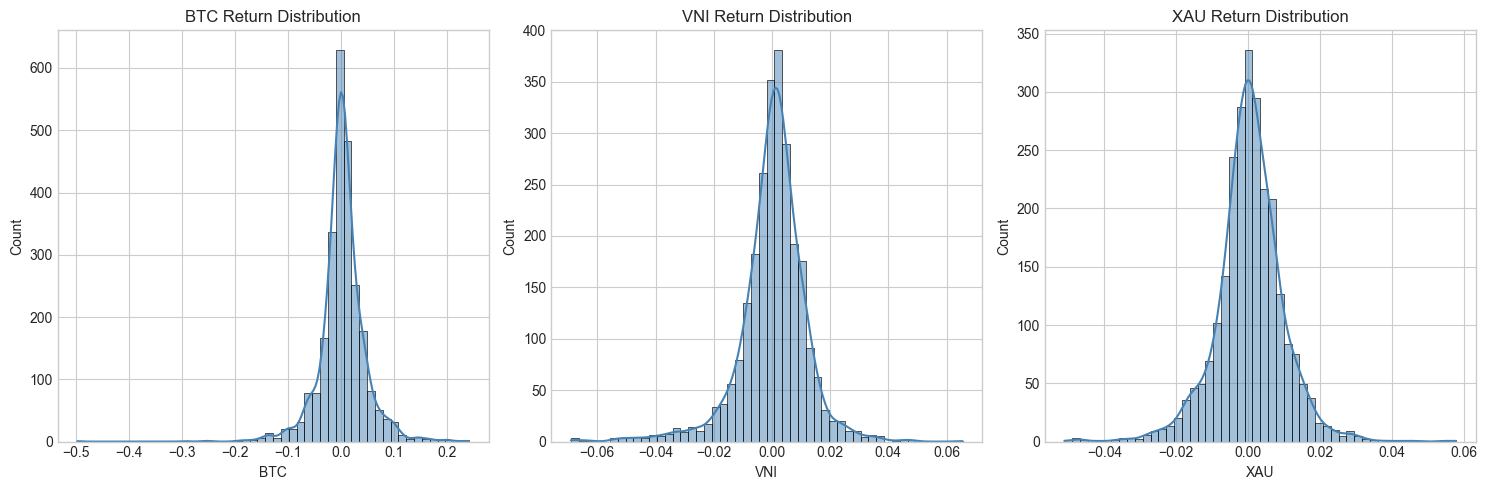

In [10]:
# === 4. Plot phân phối returns từng tài sản ===
plt.figure(figsize=(15, 5))
for i, (asset, data_) in enumerate(returns.items()):
    plt.subplot(1, 3, i+1)
    sns.histplot(data_, kde=True, bins=50, color='steelblue')
    plt.title(f'{asset} Return Distribution')
plt.tight_layout()
plt.show()

Comments: 
- Bitcoin (BTC)'s return distribution has a significantly thicker and wider tail than VNI and XAU, reflecting its high volatility and the frequency of large shocks. The peak of the distribution is low and concentrated around 0, but the leftward skew (negative skew) suggests that the risk of a deep drawdown is significant.

- VNI has a narrower distribution than BTC but still exhibits a long tail, especially on the negative side, implying that sharp declines still occur periodically. Compared to BTC, VNI is less volatile but still asymmetric and does not follow the norm.

- XAU (gold) has the closest to the norm distribution: symmetrical, short-tailed, and strongly concentrated around 0. This reinforces gold's role as a stable and less risky asset.

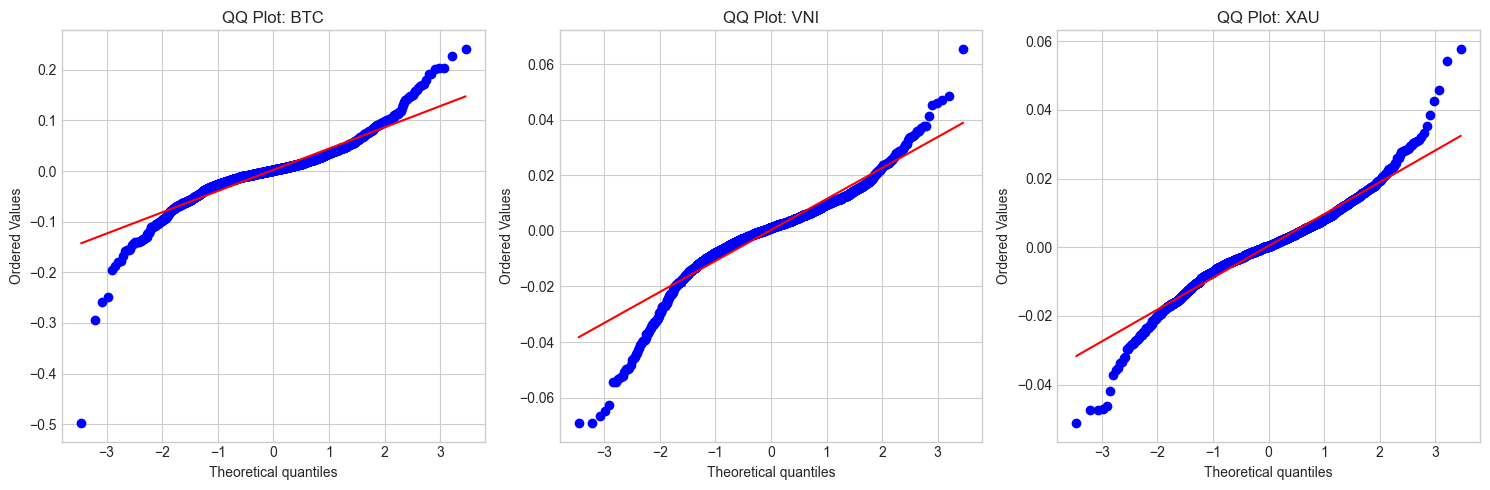

In [11]:
# === 5. QQ-plots kiểm định chuẩn ===
plt.figure(figsize=(15, 5))
for i, (asset, data_) in enumerate(returns.items()):
    plt.subplot(1, 3, i+1)
    stats.probplot(data_, dist="norm", plot=plt)
    plt.title(f'QQ Plot: {asset}')
plt.tight_layout()
plt.show()

Comments:
- Bitcoin (BTC) has a significant deviation from the normal distribution, especially at the two tails, indicating a non-normal distribution of returns and heavy tails – reflecting high risk from sharp swings.

- VNI also deviates from the normal distribution, mainly at the left tail, implying asymmetry and the possibility of unusual sharp declines – common in emerging markets.

- XAU is closer to the normal distribution, although still slightly curved at the two ends. This reinforces the stable and low-extreme-risk characteristics of gold, which is suitable for its role as a hedge against risks

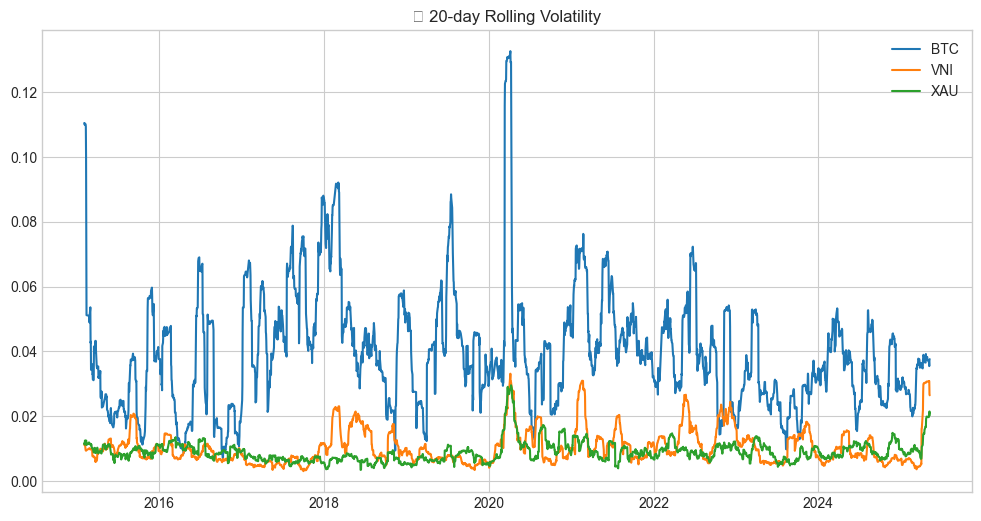

c:\Users\DELL\OneDrive\Documents\BIG DATA\Code Thầy Long\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DELL\OneDrive\Documents\BIG DATA\Code Thầy Long\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


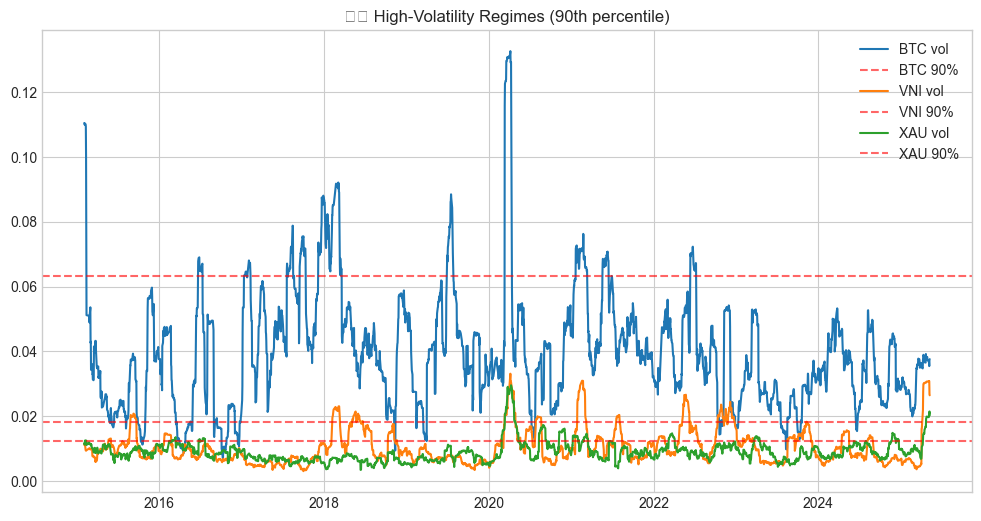

In [13]:
# === 6. Rolling Volatility (20-day) ===
rolling_vol = returns.rolling(window=20).std()

plt.figure(figsize=(12, 6))
for asset in returns.columns:
    plt.plot(rolling_vol[asset], label=asset)
plt.title('📉 20-day Rolling Volatility')
plt.legend()
plt.show()

# High-volatility thresholds (90th percentile)
thresholds = rolling_vol.quantile(0.9)

plt.figure(figsize=(12, 6))
for asset in returns.columns:
    plt.plot(rolling_vol[asset], label=f'{asset} vol')
    plt.axhline(thresholds[asset], linestyle='--', color='red', alpha=0.6, label=f'{asset} 90%')
plt.title('⚠️ High-Volatility Regimes (90th percentile)')
plt.legend()
plt.show()

Comments:

🔺 Chart 1: 20-day Rolling Volatility
- BTC (Bitcoin) exhibits the highest volatility of the three assets, with multiple swings exceeding 0.05 and peaking at nearly 0.13 – indicating high risk and high volatility over time.

- VNI (VN-Index) has much lower volatility than BTC but still has periods of spikes, especially during periods of crisis or market correction.

- XAU (Gold) is the most stable of the three assets, with rolling volatility remaining low (usually below 0.015), reflecting gold’s role as a safe haven asset.

🔺 Chart 2: High-Volatility Regimes (90th Percentile)
- The red dashed lines represent the 90% volatility threshold for each asset, helping to identify “high volatility” periods.

- BTC frequently exceeds the 90% threshold, especially during periods of high volatility such as 2017–2018 and 2020, reflecting high speculative nature.

- VNI rarely exceeds the 90% threshold, but each time it does so is usually associated with a domestic or global economic shock.

- XAU barely exceeds the 90% threshold, indicating high stability, reinforcing gold’s role as a hedge against risk.

c:\Users\DELL\OneDrive\Documents\BIG DATA\Code Thầy Long\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


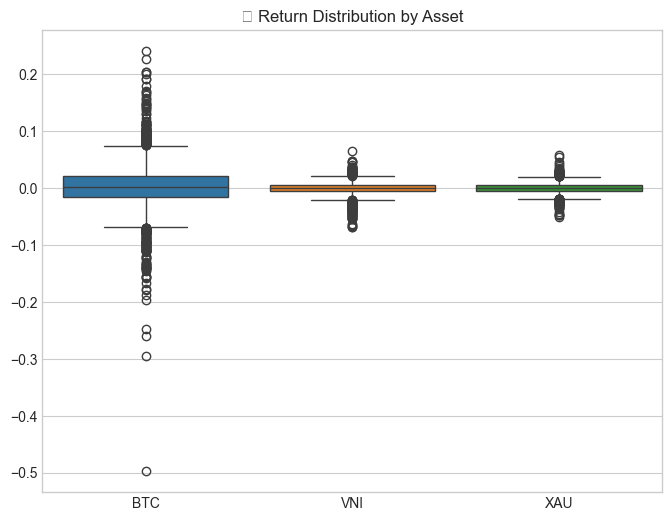

In [14]:
# === 7. Boxplot Return Comparison ===
plt.figure(figsize=(8, 6))
sns.boxplot(data=returns)
plt.title("📦 Return Distribution by Asset")
plt.show()

Comments:
- Bitcoin (BTC) shows the largest return dispersion, accompanied by many outliers at both ends. This indicates that BTC's returns are highly volatile, reflecting its high risk and high return potential. Although the median return is close to zero, BTC's return distribution is significantly skewed.

- VN-Index (VNI) has significantly lower return volatility than Bitcoin. The number of outliers is also lower, and the return distribution is relatively balanced. This reflects the characteristics of a more stable stock market than cryptocurrencies.

- Gold (XAU) is the asset with the lowest return volatility and narrowest distribution among the three. The number of outliers is also very small, consistent with its role as a safe haven asset. Gold demonstrates stability and good risk hedging ability.

c:\Users\DELL\OneDrive\Documents\BIG DATA\Code Thầy Long\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


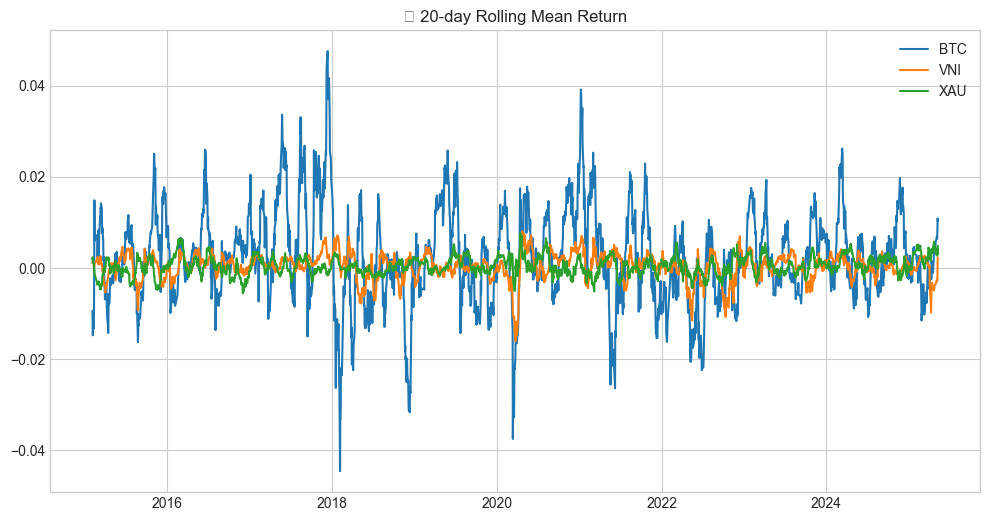

In [15]:
# === 8. Rolling Mean Return ===
rolling_mean = returns.rolling(window=20).mean()

plt.figure(figsize=(12, 6))
for asset in returns.columns:
    plt.plot(rolling_mean[asset], label=asset)
plt.title('📈 20-day Rolling Mean Return')
plt.legend()
plt.show()

Comments: 
- BTC (Bitcoin): The highest average return volatility, many periods of strong increases/decreases, showing high risk and short-term profit potential.
- VNI (VN-Index): The average return volatility is more stable than BTC, the trend is clearer in each period, reflecting a relatively stable stock market.
- XAU (Gold): The lowest average return volatility, stable and less volatile, showing safety and the role of shelter.

## Conclusion:
The EDA analysis has provided many important quantitative and visual information for three assets: **Bitcoin (BTC)**, **VN-Index (VNI)** and **Gold (XAU)**

#### 1. **Distribution of returns and tail risk**

* **BTC** and **VNI** both have negative **skew** (BTC: -0.66, VNI: -0.93), indicating a sharp increase in the probability of large drops. This warns of tail risk in valuation models and market regime classification.
* **XAU** has a lower **kurtosis** (3.51) than BTC (10.83) and VNI (5.28), meaning it is less extreme and more stable → suitable for capital preservation strategies, risk hedging or use as an alternative asset during periods of high volatility.

#### 2. **Sharpe Ratio and risk-adjusted performance**

* BTC has the highest Sharpe (0.053), indicating great profit potential **but accompanied by high volatility** → only suitable for investors who accept risk and have an adjustment strategy (hedging or diversification).

* VNI and XAU have lower Sharpe but are more stable → suggesting to keep in the portfolio when the model detects a high-risk regime.

#### 3. **Dynamic correlation**

* BTC has **low correlation with VNI and XAU** → suitable as a portfolio diversification asset.

* During crisis periods, the correlation may change → rolling correlation or regime-switching models should be used to manage systemic risk.

#### 4. **Regime classification ability**

Distribution characteristics such as negative **skewness** and high **kurtosis** of BTC and VNI indicate a high probability of sharp downside shocks (tail risk), which are useful for classifying markets by "regime":

* **Negative skew** warns of a crash risk and is suitable for identifying **risk-off regimes**.
* **High kurtosis** indicates the frequent occurrence of outliers → a sign of a **high volatility regime or crisis**.
* **Rolling skew/kurtosis/volatility** can be used to establish regime classification models such as Markov Switching or Hidden Markov Model.
* From there, help make strategic decisions: reduce risky assets when the regime is bad (BTC, VNI) and increase the proportion of safe assets (XAU) when needed.
